IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

EDA

In [34]:
Salary=pd.read_csv('https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/Naive%20bays/SalaryData_Test.csv')
Salary

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [35]:
Salary.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [36]:
Salary.shape

(15060, 14)

In [37]:
Salary.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [38]:
Salary.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [39]:
Salary.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
15055    False
15056    False
15057    False
15058    False
15059    False
Length: 15060, dtype: bool

DATA CLEANING

In [40]:
Salary[Salary.duplicated()].shape

(930, 14)

In [41]:
Salary[Salary.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
551,59,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
601,32,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
681,40,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
799,24,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
1044,44,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15043,51,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
15044,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
15049,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
15052,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [42]:
Salary_data=Salary.drop_duplicates()
Salary_data.shape

(14130, 14)

In [43]:
Salary_data['workclass'].value_counts()

 Private             10138
 Self-emp-not-inc     1279
 Local-gov            1017
 State-gov             664
 Self-emp-inc          565
 Federal-gov           460
 Without-pay             7
Name: workclass, dtype: int64

In [44]:
Salary_data['workclass'].describe()

count        14130
unique           7
top        Private
freq         10138
Name: workclass, dtype: object

In [45]:
Salary_data.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.021979,0.076765,0.053172,0.088090
educationno,0.021979,1.000000,0.132346,0.085651,0.127779
capitalgain,0.076765,0.132346,1.000000,-0.033929,0.089512
capitalloss,0.053172,0.085651,-0.033929,1.000000,0.056353
hoursperweek,0.088090,0.127779,0.089512,0.056353,1.000000


In [46]:
Salary.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [47]:
Salary_data['workclass']=Salary_data['workclass'].astype('category')
Salary_data['education']=Salary_data['education'].astype('category')
Salary_data['maritalstatus']=Salary_data['maritalstatus'].astype('category')
Salary_data['occupation']=Salary_data['occupation'].astype('category')
Salary_data['relationship']=Salary_data['relationship'].astype('category')
Salary_data['race']=Salary_data['race'].astype('category')
Salary_data['sex']=Salary_data['sex'].astype('category')
Salary_data['native']=Salary_data['native'].astype('category')

`PRE-PROCESSING DATA

In [48]:
from sklearn import preprocessing
label_encoder =preprocessing.LabelEncoder()

In [49]:
Salary_data['Salary']=label_encoder.fit_transform(Salary_data['Salary'])
Salary_data['workclass']=label_encoder.fit_transform(Salary_data['workclass'])
Salary_data['education']=label_encoder.fit_transform(Salary_data['education'])
Salary_data['maritalstatus']=label_encoder.fit_transform(Salary_data['maritalstatus'])
Salary_data['occupation']=label_encoder.fit_transform(Salary_data['occupation'])
Salary_data['relationship']=label_encoder.fit_transform(Salary_data['relationship'])
Salary_data['race']=label_encoder.fit_transform(Salary_data['race'])
Salary_data['sex']=label_encoder.fit_transform(Salary_data['sex'])
Salary_data['native']=label_encoder.fit_transform(Salary_data['native'])

VISUALISATIONS

<Axes: >

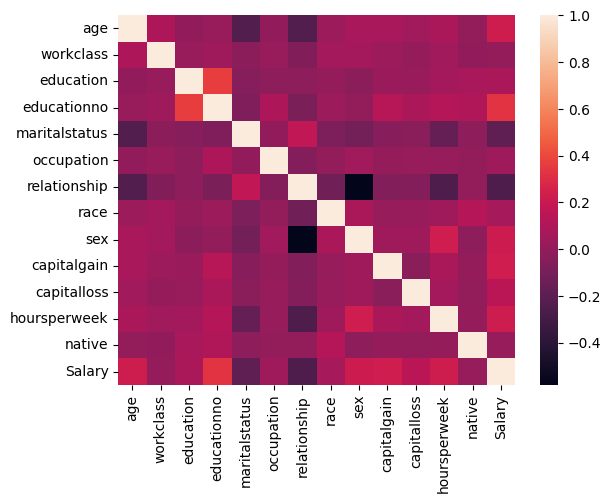

In [50]:
sns.heatmap(Salary_data.corr())

SPLITTING DATA

In [51]:
X = Salary_data.drop(['Salary'], axis=1)
y = Salary_data['Salary']

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

MODEL BUILDING

In [53]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

PREDICTIONS

In [54]:
y_pred = gnb.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 1])

CHECKING ACCURACY SCORE

In [55]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7915


COMPARING TRAINING AND TESTIG ACCURACY

In [56]:
y_pred_train = gnb.predict(X_train)
y_pred_train

array([0, 0, 1, ..., 0, 0, 0])

In [57]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7925


CHECKING FOR OVERFITTING

In [58]:
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.7925
Test set score: 0.7915
